## **Word2Vec (CBOW, Skip-gram)**
1. 라이브러리를 활용하지 않고 CBOW, Skip-gram 모델을 각각 구현, 학습합니다.
3. gensim 라이브러리를 활용하여 CBOW, Skip-gram 모델을 학습하고 시각화합니다.

## **1. Word2Vec 구현 및 학습**

### 1.1 필요한 패키지 import

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 43.5 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from tqdm import tqdm
from konlpy.tag import Okt
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

import torch
import copy
import numpy as np

### 1.2 Dataset 구축

Sample 데이터를 확인합니다.
데이터를 확인하고 Word2Vec 형식에 맞게 전처리합니다.  

In [ ]:
train_data = [
  "정말 맛있습니다. 추천합니다.",
  "기대했던 것보단 별로였네요.",
  "다 좋은데 가격이 너무 비싸서 다시 가고 싶다는 생각이 안 드네요.",
  "완전 최고입니다! 재방문 의사 있습니다.",
  "음식도 서비스도 다 만족스러웠습니다.",
  "위생 상태가 좀 별로였습니다. 좀 더 개선되기를 바랍니다.",
  "맛도 좋았고 직원분들 서비스도 너무 친절했습니다.",
  "기념일에 방문했는데 음식도 분위기도 서비스도 다 좋았습니다.",
  "전반적으로 음식이 너무 짰습니다. 저는 별로였네요.",
  "위생에 조금 더 신경 썼으면 좋겠습니다. 조금 불쾌했습니다."       
]

test_words = ["음식", "맛", "서비스", "위생", "가격"]

KoNLPy 패키지에서 제공하는 Twitter(Okt) tokenizer를 사용하여 tokenization합니다.

In [ ]:
tokenizer = Okt()

In [ ]:
def make_tokenized(data):
    tokenized = []
    for sent in tqdm(data):
        tokens = tokenizer.morphs(sent, stem=True)
        tokenized.append(tokens)

    return tokenized

In [ ]:
train_tokenized = make_tokenized(train_data) 

100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


tokenize된 데이터를 확인해봅시다. 

In [ ]:
train_tokenized

Tokenize 된 단어의 빈도 수를 확인할 수 있는 `word_count` 를 생성합니다.

In [ ]:
word_count = defaultdict(int) #default값이 int인 딕셔너리, 값을 지정하지 않았다면 0으로 지정됨

for tokens in tqdm(train_tokenized):
    for token in tokens:
        word_count[token] += 1

가장 많이 등장한 토큰부터 적게 등장한 토큰 순으로 나열하여 `word_count` 를 확인해 봅니다.

In [ ]:
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print(list(word_count))

각 단어를 정수 값(index) 에 mapping 하는 word to index (`w2i`) 를 생성합니다.

`w2i` 의 전체 크기는 고유한 단어의 개수(vocab size)와 동일합니다.

- 가장 많이 나온 단어가 정수 0, 적게 나온 단어가 정수 n을 부여받도록 해주세요.

In [ ]:
w2i = {}
for pair in tqdm(word_count):
    ## TO DO (start) ##
        
    ## TO DO (end) ##

In [ ]:
print(train_tokenized)
print(w2i)

실제 모델에 들어가기 위한 input을 만들기 위해 `Dataset` 클래스를 정의합니다.

**Tip** `torch.utils.data.Dataset`


---
파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 Dataset과 DataLoader를 제공합니다.

이 도구를 활용하면 미니 배치 학습, 데이터 셔플, 병렬 처리를 간단히 수행할 수 있습니다. 

Dataset 를 정의하고 이를 DataLoader 에 전달함으로써 사용할 수 있습니다.

파이토치에서 제공하는 Dataset 을 커스텀하여 `CBOWDataset` 과 `SkipGramDataset` 을 정의해 봅시다.

`__init__`, `__len__`, `__getitem__` 을 다시 정의함으로써 커스텀할 수 있습니다.

출처: https://wikidocs.net/55580


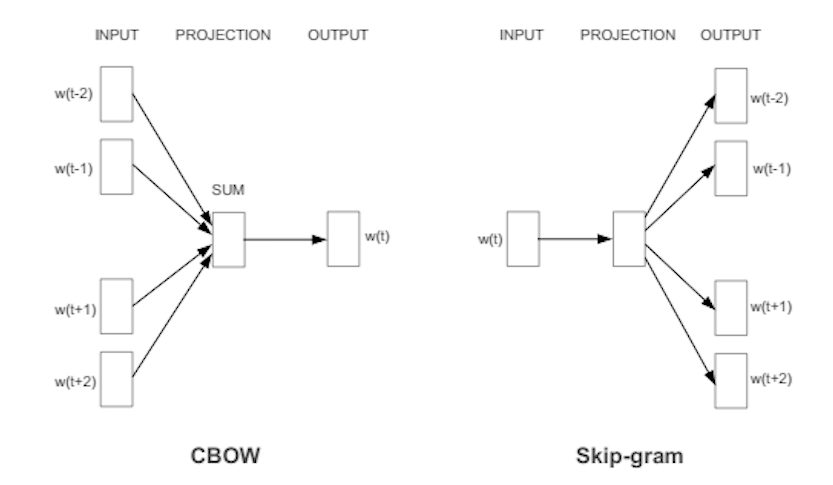

CBOW 는 window 내에 있는 context word를 가지고 target word 하나를 맞추는 과정에서 학습됩니다.

Skip-gram 은 target word 하나를 가지고 주변 context word 를 맞추는 과정에서 학습됩니다.

In [ ]:
class CBOWDataset(Dataset):
    def __init__(self, train_tokenized, window_size=2):
        self.x = []
        self.y = []
        
        ## TO DO (start) ##
        
        ## TO DO (end) ##
        
        self.x = torch.LongTensor(self.x)  # (전체 데이터 개수, 2 * window_size)
        self.y = torch.LongTensor(self.y)  # (전체 데이터 개수)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
cbow_set = CBOWDataset(train_tokenized)
print(list(cbow_set))

In [ ]:
class SkipGramDataset(Dataset):
    def __init__(self, train_tokenized, window_size=2):
        self.x = []
        self.y = []

        ## TO DO ##
        # start #

        #  end  #
        self.x = torch.LongTensor(self.x)  # (전체 데이터 개수)
        self.y = torch.LongTensor(self.y)  # (전체 데이터 개수)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [ ]:
skipgram_set = SkipGramDataset(train_tokenized)
print(list(skipgram_set))

### 1.3 모델 Class 구현

차례대로 두 가지 Word2Vec 모델을 구현합니다.  


*   `self.embedding`: `vocab_size` 크기의 one-hot vector를 특정 크기의 `dim` 차원으로 embedding 시키는 layer.
*   `self.linear`: 변환된 embedding vector를 다시 원래 `vocab_size`로 바꾸는 layer.


**Tip** `nn.Embedding` 


---


위에서 단어(토큰)을 고유한 정수 값으로 매핑하기 위해 정의한 `w2i` 를 떠올려 봅시다. <br>
입력 시퀀스의 단어를 모델의 입력으로 사용하기 위해서는,

1. `w2i` 를 이용해 각 단어를 고유한 정수 값으로 인코딩합니다.
2. 인코딩된 정수 시퀀스를 임베딩 층에 통과시킵니다.
3. 입력 시퀀스의 길이와 동일한 개수의 임베딩 벡터를 얻습니다. <br>

`nn.Embedding` 은 전체 어휘 집합 개수의 임베딩 벡터들 가운데 각 단어의 인덱스에 해당한는 임베딩 벡터에 접근하는 lookup table 로써 2번을 할 수 있도록 해줍니다. 

임베딩 벡터는 훈련 과정에서 학습됩니다.



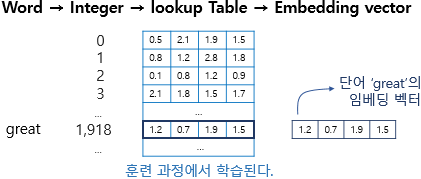

출처: https://wikidocs.net/64779

`nn.Embedding` 의 input 과 output 은 다음과 같습니다.


*   Input: (*), IntTensor or LongTensor of arbitrary shape containing the indices to extract
*   Output: (*, $H$), where * is the input shape and $H =\text{embediding_dim}$

```
# an Embedding module containing 10 tensors of size 3
embedding = nn.Embedding(10, 3)
# a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
embedding(input)
tensor([[[-0.0251, -1.6902,  0.7172],
         [-0.6431,  0.0748,  0.6969],
         [ 1.4970,  1.3448, -0.9685],
         [-0.3677, -2.7265, -0.1685]],

        [[ 1.4970,  1.3448, -0.9685],
         [ 0.4362, -0.4004,  0.9400],
         [-0.6431,  0.0748,  0.6969],
         [ 0.9124, -2.3616,  1.1151]]])
```



출처: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html



In [ ]:
embedding = nn.Embedding(10, 3)
input = torch.LongTensor([[1,2,4,5],[4,3,2,9]])
embedding(input)

In [ ]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, dim):
        super(CBOW, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim, sparse=True)
        self.linear = nn.Linear(dim, vocab_size)

    # B: batch size, W: window size, d_w: word embedding size, V: vocab size
    def forward(self, x):  # x: (B, 2W)
        
        ## TO DO ##
        # start #

        #  end  #
        
        return output

In [ ]:
cbow_loader = DataLoader(cbow_set, batch_size=64)
sample_x, sample_y = next(iter(cbow_loader))
cbow = CBOW(vocab_size=len(w2i), dim=256)
cbow(sample_x)

In [ ]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, dim):
        super(SkipGram, self).__init__()
        self.embedding = nn.Embedding(vocab_size, dim, sparse=True)
        self.linear = nn.Linear(dim, vocab_size)

    # B: batch size, W: window size, d_w: word embedding size, V: vocab size
    def forward(self, x): # x: (B)

        ## TO DO ##
        # start #

        #  end  #
        
        return output

In [ ]:
skipgram_loader = DataLoader(skipgram_set, batch_size=batch_size)
sample_x, sample_y = next(iter(skipgram_loader))
skipgram = SkipGram(vocab_size=len(w2i), dim=256)
skipgram(sample_x)

### 1.4 모델 학습 

다음과 같이 hyperparamter를 세팅하고 `DataLoader` 객체를 만듭니다.

**Tip** `torch.utils.data.DataLoader` 


---

Dataloader 는 앞서 정의한 Dataset 를 전달 받아 학습 과정에서 모델의 입력으로 사용할 수 있도록 데이터를 load 해줍니다. 

batch_size 를 정해줌으로써 미니 배치 학습이 가능한 형태로 데이터를 가공합니다.

예를 들어, 전체 데이터 수가 100 개 이고 batch size 가 20인 경우, 데이터는 20개의 데이터가 하나의 배치로 묶여 총 5개 의 배치로 구성됩니다.
즉, (100, ) 사이즈의 데이터가 (5, 20, ) 로 변하게 됩니다.

모델을 학습할 때에는 for loop 을 돌면서 한 iteration 에 하나의 배치를 데이터 로더로부터 전달 받아 모델의 입력으로 사용합니다.


```
# Example of DataLoader usage
for batch in data_loader:
    output = model(batch)
```


In [ ]:
batch_size=4
learning_rate = 5e-4
num_epochs = 5
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

cbow_loader = DataLoader(cbow_set, batch_size=batch_size)
skipgram_loader = DataLoader(skipgram_set, batch_size=batch_size)

첫번째로 CBOW 모델 학습입니다.


In [ ]:
cbow.train()
cbow = cbow.to(device)
optim = torch.optim.SGD(cbow.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

for e in range(1, num_epochs+1):
    print("#" * 50)
    print(f"Epoch: {e}")
    for batch in tqdm(cbow_loader):
        x, y = batch
        x, y = x.to(device), y.to(device) # (B, W), (B)
        output = cbow(x)  # (B, V)

        optim.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optim.step()

        print(f"Train loss: {loss.item()}")

print("Finished.")

다음으로 Skip-gram 모델 학습입니다.

In [ ]:
skipgram.train()
skipgram = skipgram.to(device)
optim = torch.optim.SGD(skipgram.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

for e in range(1, num_epochs+1):
    print("#" * 50)
    print(f"Epoch: {e}")
    for batch in tqdm(skipgram_loader):
        x, y = batch
        x, y = x.to(device), y.to(device) # (B, W), (B)
        output = skipgram(x)  # (B, V)

        optim.zero_grad()
        loss = loss_function(output, y)
        loss.backward()
        optim.step()

        print(f"Train loss: {loss.item()}")

print("Finished.")

### 1.5 테스트

학습된 각 모델을 이용하여 test 단어들의 word embedding을 확인합니다.

In [ ]:
for word in test_words:
    input_id = torch.LongTensor([w2i[word]]).to(device)
    emb = cbow.embedding(input_id)

    print(f"Word: {word}")
    print(emb.squeeze(0))

In [ ]:
for word in test_words:
    input_id = torch.LongTensor([w2i[word]]).to(device)
    emb = skipgram.embedding(input_id)

    print(f"Word: {word}")
    print(max(emb.squeeze(0)))

## **2. gensim library 를 활용한 word2vec 학습 및 시각화**

### 2.1 필요한 패키지 import

In [ ]:
# To ignore deprecated warnings
import warnings
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)
import os
import random
import numpy as np
from gensim.models import word2vec #  word2vec 관련 모델을 제공해주는 library  
import nltk
from nltk.corpus import movie_reviews # corpus 를 가져오는 용도 
from sklearn.manifold import TSNE # 시각화를 위한 TSNE 사용 
from sklearn.metrics import accuracy_score # accuracy score 를 계산하기 위한 metric 라이브러리 불러오기 
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from torch.utils import data # pytorch data class 
import torch.nn as nn # pytorch neural network 불러오기 
import torch.nn.utils.rnn as rnn_utils # rnn utils
import torch

import pickle

# os.environ["CUDA_VISIBLE_DEVICES"]="1"

### 2.2 Word embedding 학습

In [ ]:
# 파라메터값 지정
num_features = 300 # 임베딩 벡터 사이즈
negative = 10 # negative sampling할 단어 수
min_word_count = 10 # 한 문장에 대한 최소 문자 수
window = 5 # context window 사이즈
downsampling = 0.75 # 단어의 빈도수가 높은 단어에 대해 빈도수를 낮춤
epoch = 5 # epoch 수

In [ ]:
# preparing data
sentences = []
pos_data = open("./data/pos_train.txt").readlines()
neg_data = open("./data/neg_train.txt").readlines()
data_ = pos_data + neg_data
for line in data_:
    sentences.append(line.strip().split(' '))

In [ ]:
# skip-gram 모델 학습
skip_gram = word2vec.Word2Vec(sentences,
                              sg = 1, # skip-gram
                              negative=negative,
                              size=num_features, 
                              min_count=min_word_count,
                              window=window,
                              sample=downsampling,
                              iter=epoch)

# CBOW 모델 학습
CBOW = word2vec.Word2Vec(sentences,
                              sg = 0, # CBOW
                              negative=negative,
                              size=num_features, 
                              min_count=min_word_count,
                              window=window,
                              sample=downsampling,
                              iter=epoch)

### 2.3 학습한 embedding 확인 및 시각화


특정 단어와 유사한 의미를 가지는 단어를 추출해 봄으로써 임베딩에 단어의 의미가 잘 학습되었는지 확인합니다.

In [ ]:
skip_gram.wv.most_similar("man") # skip-gram 모델을 이용하여 'man'에 가장 유사한 단어 추출

In [ ]:
CBOW.wv.most_similar("man") # CBOW 모델을 이용하여 'man'에 가장 유사한 단어 추출

300차원의 단어 임베딩을 2차원으로 차원 축소하여 시각화함으로써 임베딩 벡터의 분포를 확인해 봅니다.

**Tip** `t-SNE` 


---

t-SNE 는 차원 축소 (dimensionality reduction)와 시각화(visualization) 방법입니다.

Stochastic Neighboring Embedding(SNE) 라는 고차원 공간에 존재하는 데이터 $x$의 이웃 간의 거리를 최대한 보존하는 저차원의 $y$를 학습하는 방법입니다.

고차원 공간에서 특정 개체 $x_i$ 가 주어졌을 때 이웃 객체 $x_j$ 가 선택될 확률을 $p_{j|i}$, 저차원 공간에서 특정 개체 $y_i$ 가 주어졌을 때 이웃 객체 $y_j$ 가 선택될 확률을 $q_{j|i}$ 라고 한다면 SNE 는 $p$ 와 $q$의 분포 차이를 최대한 작게 함으로써 학습됩니다. 

두 확률분포의 유사도는 Kullback-Leibler divergence 라는 지표를 활용합니다.

SNE 는 가우시안 분포를 전제하는데, 가우시안 분포가 아닌 t분포를 가정하는 것이 t-SNE입니다.

출처: https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/

In [ ]:
def render_TSNE(vocab, word_emb):
    """
    TSNE를 이용한 word2vec 시각화 
    args:
        vocab    - vocab list
        word_emb - word embeddings
    """
    tsne = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32) #TSNE 시각화를 위한 initialization
    _tsne = tsne.fit_transform(word_emb) # TSNE 시각화 적용
    x_coordinate = _tsne[:,0] # x 좌표
    y_coordinate = _tsne[:,1] # y 좌표

    # scatter plot initialization
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 20)
    ax.scatter(x_coordinate, y_coordinate)

    for i, word in enumerate(random_vocab):
        ax.annotate(word,(x_coordinate[i], y_coordinate[i]), fontsize=30) # 각 scatter들에대해 단어 labeling

    plt.show()

In [ ]:
# Skip-gram 시각화(TSNE)
vocab = list(skip_gram.wv.vocab) # vocab list 불러오기
random_vocab = random.sample(vocab,k=100) #100개의 임의 단어를 랜덤 샘플링
word_emb = skip_gram[random_vocab] # 샘플링된 단어에 대해 학습된 임베딩 벡터 불러오기
render_TSNE(random_vocab, word_emb) # TSNE 시각화

In [ ]:
# CBOW 시각화(TSNE)
vocab = list(CBOW.wv.vocab) # vocab list 불러오기
random_vocab = random.sample(vocab,k=100) #100개의 임의 단어를 랜덤 샘플링
word_emb = skip_gram[random_vocab] # 샘플링된 단어에 대해 학습된 임베딩 벡터 불러오기
render_TSNE(random_vocab, word_emb) # TSNE 시각화